# **Simulazione 10**

**Genero dati**
- numero osservazioni = 5000
- numero gruppi = 10
- numero clusters = 2
- probabilità dei cluster = [0.5, 0.5]
- numero covariate fisse continue = 2
- numero covaraite fisse categoriche = 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
from sklearn import preprocessing
import random

In [2]:
n_obs = 7500
n_groups = 10  # number of levels
n_per_group = n_obs/n_groups  # number of observations per level

# creazione della categorica relativa ai gruppi
group_ids = np.repeat(np.arange(1, n_groups + 1), n_per_group)

# probabilità di ciascun cluster di osservazioni
w = [0.4, 0.3, 0.3]

In [3]:
# random intercept
prob = np.repeat(1/n_groups, n_groups)
interc_1 = np.random.multinomial(n_groups, prob)
interc_1 = np.minimum(interc_1, 1) # fisso il numero massimo di categorie ottenute (2 + 1)
interc_2 = np.random.multinomial(n_groups, prob)
interc_2 = np.minimum(interc_2, 2)
interc_3 = np.random.multinomial(n_groups, prob)
interc_3 = np.minimum(interc_3, 2)

In [4]:
# covariate fisse estratte da una normale
mean_1 = [-10,-10]
cov_1 = np.array([[0.7, 0.5], [0.5, 3]])

mean_2 = [0,0]
cov_2 = np.array([[2, -1], [-1, 3]])

mean_3 = [0,-12]
cov_3 = np.array([[0.5, 0.2], [0.2, 1]])

data_1 = np.random.multivariate_normal(mean_1, cov_1, int(w[0] * n_obs))
data_2 = np.random.multivariate_normal(mean_2, cov_2, int(w[1] * n_obs))
data_3 = np.random.multivariate_normal(mean_3, cov_3, int(w[2] * n_obs))
data = np.vstack((data_1, data_2, data_3)) # combina i dati

# Crea un DataFrame
data = pd.DataFrame(data, columns=['x1', 'x2'])

# covariata categorica
categorie = ["A", "B"]
prob_1 = [0.5,0.5]
prob_2 = [0.3,0.7]
prob_3 = [0.6, 0.4]
cov_cat_1 = np.random.choice(categorie, size=int(w[0] * n_obs), p=prob_1)
cov_cat_2 = np.random.choice(categorie, size=int(w[1] * n_obs), p=prob_2)
cov_cat_3 = np.random.choice(categorie, size=int(w[2] * n_obs), p=prob_3)
cov_cat = np.concatenate((cov_cat_1, cov_cat_2, cov_cat_3)) # combina i dati
data['cat'] = cov_cat

# Aggiungi le colonne 'level' e 'latent'
np.random.shuffle(group_ids)
data['group'] = group_ids
data['cluster'] = np.repeat(np.arange(1, len(w) + 1), [int(w[i] * n_obs) for i in range(len(w))])

# Riordina le colonne
data = data[['group', 'cluster', 'x1', 'x2','cat']]
data['cat'] = data['cat'].astype('category')

In [5]:
data

,group,cluster,x1,x2,cat
0,7,1,-8.965681,-6.501819,A
1,9,1,-8.699474,-9.259339,A
2,8,1,-10.934925,-9.073915,B
3,1,1,-10.215636,-10.358142,B
4,9,1,-11.605141,-11.611048,A
...,...,...,...,...,...
7495,10,3,0.853390,-11.321571,A
7496,9,3,-0.434535,-11.459278,B
7497,10,3,-0.575381,-13.762696,A
7498,5,3,-0.381354,-12.050740,B


In [6]:
data['x1'] = preprocessing.scale(data.x1)
data['x2'] = preprocessing.scale(data.x2)

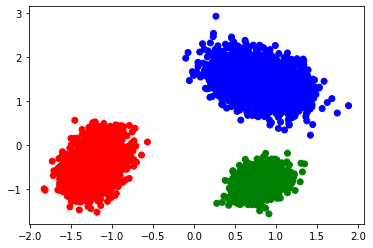

In [7]:
col = []
for i in range(n_obs):
  if data['cluster'][i]== 1 :
    col.append('r')
  elif data['cluster'][i]== 2 :
    col.append('b')
  else :
    col.append('g')
plt.scatter(data['x1'], data['x2'], color=col)
plt.savefig('cluster.png', bbox_inches='tight')

In [8]:
data = pd.get_dummies(data, columns=['cat'], drop_first=True)
data['cat_B'] = data['cat_B'].astype(int)

In [9]:
lin_pred = []
y = []

for i in range(n_obs):
  if data['cluster'][i] == 1:
    lin_pred.append(interc_1[data['group'][i] - 1] + 2 * data['x1'][i] - 0.4 * data['x2'][i] + 2 * data['cat_B'][i])
  if data['cluster'][i] == 2:
    lin_pred.append(interc_2[data['group'][i] - 1] + 1.8 * data['x1'][i] - 0.6 * data['x2'][i] - 2 * data['cat_B'][i] )
  if data['cluster'][i] == 3:
    lin_pred.append(interc_3[data['group'][i] - 1] - 1.5 * data['x1'][i] - 0.4 * data['x2'][i] - 0.1 * data['cat_B'][i] )
  prob = 1 / (1 + np.exp(-lin_pred[i]))
  y.append(np.random.binomial(1, prob))

data['lin_pred'] = lin_pred
data['y'] = y

In [10]:
np.sum(data['y'][data['cluster']==3])

1099

In [11]:
len(data[data['cluster']==3]['group'])

2250

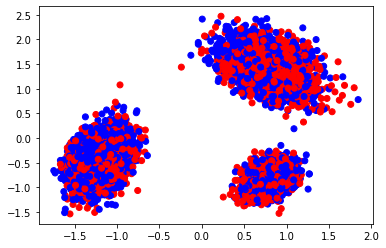

In [14]:
col = []
for i in range(n_obs):
  if data['y'][i]== 1 :
    col.append('r')
  else :
    col.append('b')
plt.scatter(data['x1'], data['x2'], color=col)
plt.savefig('target_variable.png', bbox_inches='tight')

In [15]:
data

,group,cluster,x1,x2,cat_B,lin_pred,y
0,6,1,-1.444953,-0.535958,1,-0.675523,1
1,7,1,-1.048481,-0.601186,0,-1.856487,0
2,9,1,-1.359788,0.192378,0,-1.796527,0
3,5,1,-1.175427,-0.283908,0,-2.237291,1
4,6,1,-1.195397,-0.083637,0,-2.357340,0
...,...,...,...,...,...,...,...
7495,5,3,0.855225,-0.934295,0,-0.909120,1
7496,10,3,0.855830,-0.604685,0,-0.041871,1
7497,10,3,0.692234,-0.938256,0,0.336952,1
7498,8,3,1.118939,-0.661910,0,-1.413644,0


**Fit di tutto l'algoritmo**

In [12]:
import numdifftools

In [13]:
from algo_full import Algo_full 

In [17]:
params, log_l, z, iter = Algo_full(data = data, y = data['y'], C = 2,
                             U = data[['x1','x2']], V = data['cat_B'], num_fix = 3,
                             num_group = n_groups, alpha = 0.01, mod = 'B',
                             num_obs_groups = np.repeat(n_per_group,n_groups),
                             group_name = 'group', name_fix = ['x1','x2','cat_B'], y_name='y', perc_collasso=0.01,max_iter=20)

3.798095186525477e-137
3.798095186525477e-137
3.799041261049762e-137
3.7990412624702455e-137
3.8170011140236367e-137
3.817001114025398e-137
3.817001114025398e-137
5.359162308131804e-137
5.359162308866516e-137
5.3591623088692655e-137
4.448360500400598e-133
4.448360500400598e-133
4.448360679269886e-133
4.448360679269951e-133
4.4483676317411825e-133
4.4483676317411825e-133
4.4483676317411825e-133
5.9636279916407845e-133
5.963627991641004e-133
5.963627991641004e-133
3.9905485469966805e-132
3.9905485469966805e-132
3.990548575356649e-132
3.990548575356652e-132
3.9905493537365586e-132
3.9905493537365586e-132
3.9905493537365586e-132
5.158584136940564e-132
5.158584136940586e-132
5.158584136940586e-132
1.804174481565667e-131
1.804174481565667e-131
1.8041744852808183e-131
1.8041744852808183e-131
1.8041745573026004e-131
1.8041745573026004e-131
1.8041745573026004e-131
2.2352409636728456e-131
2.2352409636728471e-131
2.2352409636728471e-131
3.006339690247256e-131
3.006339690247256e-131
3.006339694134

[-0.55671 -0.02359 -1.15303]
D_triu
[[    nan 0.53312 0.59633]
 [    nan     nan 1.12944]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 0.59633]
 [    nan     nan 1.12944]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 1.12944]
 [    nan     nan     nan]]
I move on to the check other masses
3.0570092693758857e-131
3.0570092693758857e-131
3.057009273219207e-131
3.057009273219207e-131
3.0570093452121827e-131
3.0570093452121827e-131
3.0570093452121827e-131
3.7403436564323885e-131
3.74034365643239e-131
3.74034365643239e-131
[-0.55671 -0.02359 -1.15303]
D_triu
[[    nan 0.53312 0.59633]
 [    nan     nan 1.12944]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 0.59633]
 [    nan     nan 1.12944]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 1.12944]
 [    nan     nan     

[2.19862 2.19865 2.19864 0.60236 2.19863]
D_triu
[[        nan 3.50099e-05 1.66218e-05 1.59626e+00 8.23377e-06]
 [        nan         nan 1.83881e-05 1.59629e+00 2.67761e-05]
 [        nan         nan         nan 1.59627e+00 8.38798e-06]
 [        nan         nan         nan         nan 1.59626e+00]
 [        nan         nan         nan         nan         nan]]
6.502574298791436e-47
6.502574887737773e-47
6.502574887737773e-47
6.502574896132037e-47
6.502575851069387e-47
6.543183993078943e-47
2.968963671812765e-46
3.0515769780186952e-46
3.0515769780188563e-46
3.0515769780188563e-46
[2.2055  2.20554 2.20552 0.60922]
D_triu
[[        nan 3.51217e-05 1.66747e-05 1.59628e+00]
 [        nan         nan 1.84470e-05 1.59631e+00]
 [        nan         nan         nan 1.59629e+00]
 [        nan         nan         nan         nan]]
6.508415334634183e-47
6.508415924761425e-47
6.508415924761425e-47
6.508415933144304e-47
6.508416892333529e-47
6.549384594741977e-47
2.9631387262195543e-46
3.045333653

3.730268419884728e-131
[-2.31195e-02 -5.56227e-01 -2.30962e-02 -3.02625e-18 -2.31074e-02
 -1.15251e+00 -2.30712e-02]
D_triu
[[        nan 5.33107e-01 2.33360e-05 2.31195e-02 1.21219e-05 1.12939e+00
  4.83185e-05]
 [        nan         nan 5.33131e-01 5.56227e-01 5.33119e-01 5.96282e-01
  5.33156e-01]
 [        nan         nan         nan 2.30962e-02 1.12141e-05 1.12941e+00
  2.49825e-05]
 [        nan         nan         nan         nan 2.31074e-02 1.15251e+00
  2.30712e-02]
 [        nan         nan         nan         nan         nan 1.12940e+00
  3.61966e-05]
 [        nan         nan         nan         nan         nan         nan
  1.12944e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
3.0570767071318407e-131
3.0570767071318407e-131
3.057076710986888e-131
3.057076710986888e-131
3.0570767828189654e-131
3.0570767828189654e-131
3.0570767828189654e-131
3.7395701307343403e-131
3.739570130734342e-131
3.739570130734342e-131
[-2.31195e-02 -5

[-6.68681e-04  9.51627e-01  2.18006e+00  2.18005e+00  2.18010e+00
  2.18010e+00  2.18007e+00  2.18006e+00]
D_triu
[[        nan 9.52295e-01 2.18073e+00 2.18072e+00 2.18077e+00 2.18077e+00
  2.18074e+00 2.18072e+00]
 [        nan         nan 1.22844e+00 1.22842e+00 1.22847e+00 1.22847e+00
  1.22844e+00 1.22843e+00]
 [        nan         nan         nan 1.59112e-05 3.77740e-05 3.47456e-05
  5.84371e-06 7.85774e-06]
 [        nan         nan         nan         nan 5.36852e-05 5.06568e-05
  2.17549e-05 8.05344e-06]
 [        nan         nan         nan         nan         nan 3.02843e-06
  3.19303e-05 4.56317e-05]
 [        nan         nan         nan         nan         nan         nan
  2.89019e-05 4.26033e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 1.37015e-05]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
7.80719885605711e-47
7.807199039092636e-47
7.807199039092654e-47
7.8071996582

3.8020948434084447e-131
3.8020948434084447e-131
[ 8.98618e-04 -1.14506e+00  8.11891e-05 -1.59177e-02  1.61879e-04
 -5.48898e-01  1.98268e-03  1.63195e-04]
D_triu
[[        nan 1.14596e+00 8.17428e-04 1.68163e-02 7.36739e-04 5.49797e-01
  1.08406e-03 7.35422e-04]
 [        nan         nan 1.14514e+00 1.12914e+00 1.14522e+00 5.96158e-01
  1.14704e+00 1.14522e+00]
 [        nan         nan         nan 1.59989e-02 8.06897e-05 5.48980e-01
  1.90149e-03 8.20060e-05]
 [        nan         nan         nan         nan 1.60796e-02 5.32981e-01
  1.79004e-02 1.60809e-02]
 [        nan         nan         nan         nan         nan 5.49060e-01
  1.82080e-03 1.31636e-06]
 [        nan         nan         nan         nan         nan         nan
  5.50881e-01 5.49062e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 1.81948e-03]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
3.1203506977840115e-131
3.120

5.857218563023886e-47
5.857219043854158e-47
5.857219043854158e-47
5.857219052535743e-47
5.857219751355181e-47
5.880340684714211e-47
3.186336434225919e-46
3.294459328172244e-46
3.2944593281723842e-46
3.2944593281723842e-46
6.167746389195045e-47
6.167746916366623e-47
6.167746916366623e-47
6.167746925069196e-47
6.167747725753816e-47
6.196661233118975e-47
3.1358042216398153e-46
3.2349671762250417e-46
3.234967176225193e-46
3.234967176225193e-46
[2.04562 2.04561 2.04563 2.0456  0.45019 2.04568 2.04564 2.0457  2.0456
 2.04568]
D_triu
[[        nan 8.26961e-06 1.05842e-05 1.38619e-05 1.59543e+00 6.09070e-05
  2.38311e-05 8.21271e-05 2.19730e-05 6.61199e-05]
 [        nan         nan 1.88538e-05 5.59227e-06 1.59542e+00 6.91766e-05
  3.21007e-05 9.03967e-05 1.37034e-05 7.43895e-05]
 [        nan         nan         nan 2.44461e-05 1.59544e+00 5.03228e-05
  1.32469e-05 7.15429e-05 3.25572e-05 5.55357e-05]
 [        nan         nan         nan         nan 1.59541e+00 7.47689e-05
  3.76930e-05 9.59

[[    nan 1.59636]
 [    nan     nan]]
I move on to the check other masses
6.516145531827392e-47
6.516146124196792e-47
6.516146124196792e-47
6.516146132545592e-47
6.516147095886453e-47
6.557657276597571e-47
2.9535730429736295e-46
3.0349142126423387e-46
3.0349142126425e-46
3.0349142126425e-46
[2.21566 0.6193 ]
D_triu
[[    nan 1.59636]
 [    nan     nan]]
I move on to the check other masses
6.516145531827392e-47
6.516146124196792e-47
6.516146124196792e-47
6.516146132545592e-47
6.516147095886453e-47
6.557657276597571e-47
2.9535730429736295e-46
3.0349142126423387e-46
3.0349142126425e-46
3.0349142126425e-46
FINE ITERAZIONE 2
1.1618075150511579e-137
1.1618075150511579e-137
1.1624443209570547e-137
1.1624443221078295e-137
1.188894595739735e-137
1.188894595741038e-137
1.188894595741038e-137
1.670300604869684e-137
1.6703006050581124e-137
1.6703006050616057e-137
9.637696277198239e-133
9.637696277198239e-133
9.637696361764041e-133
9.637696361764091e-133
9.637703228337378e-133
9.637703228337378e-1

[-0.03123 -0.51117 -0.88464 -1.39494]
D_triu
[[    nan 0.47994 0.85341 1.36371]
 [    nan     nan 0.37347 0.88377]
 [    nan     nan     nan 0.51029]
 [    nan     nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 0.47994 0.85341 1.36371]
 [    nan     nan     nan 0.88377]
 [    nan     nan     nan 0.51029]
 [    nan     nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 0.85341 1.36371]
 [    nan     nan     nan 0.88377]
 [    nan     nan     nan 0.51029]
 [    nan     nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 0.85341 1.36371]
 [    nan     nan     nan 0.88377]
 [    nan     nan     nan     nan]
 [    nan     nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan 1.36371]
 [    nan     nan     nan 0.88377]
 [    nan     nan     nan     nan]
 [    nan     nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan 1.36371]


[-5.55378e-04 -4.90430e-04  2.18013e+00  9.51728e-01 -5.55480e-04
 -5.55424e-04  2.18017e+00 -5.57807e-04]
D_triu
[[        nan 6.49482e-05 2.18068e+00 9.52283e-01 1.01394e-07 4.54514e-08
  2.18073e+00 2.42833e-06]
 [        nan         nan 2.18062e+00 9.52218e-01 6.50496e-05 6.49936e-05
  2.18066e+00 6.73765e-05]
 [        nan         nan         nan 1.22840e+00 2.18068e+00 2.18068e+00
  4.23742e-05 2.18069e+00]
 [        nan         nan         nan         nan 9.52283e-01 9.52283e-01
  1.22844e+00 9.52286e-01]
 [        nan         nan         nan         nan         nan 5.59426e-08
  2.18073e+00 2.32694e-06]
 [        nan         nan         nan         nan         nan         nan
  2.18073e+00 2.38288e-06]
 [        nan         nan         nan         nan         nan         nan
          nan 2.18073e+00]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
7.807064340118352e-47
7.807064523151403e-47
7.807064523151421e-47
7.807065142

3.883541759558232e-130
3.883541759558232e-130
[ 7.90585e-04  6.89695e-04  1.32701e-03 -8.74408e-01 -1.38433e+00
 -5.01505e-01 -4.36123e-01 -2.12006e-02]
D_triu
[[        nan 1.00890e-04 5.36423e-04 8.75199e-01 1.38512e+00 5.02296e-01
  4.36914e-01 2.19912e-02]
 [        nan         nan 6.37313e-04 8.75098e-01 1.38502e+00 5.02195e-01
  4.36813e-01 2.18903e-02]
 [        nan         nan         nan 8.75735e-01 1.38566e+00 5.02832e-01
  4.37450e-01 2.25276e-02]
 [        nan         nan         nan         nan 5.09926e-01 3.72903e-01
  4.38285e-01 8.53208e-01]
 [        nan         nan         nan         nan         nan 8.82829e-01
  9.48211e-01 1.36313e+00]
 [        nan         nan         nan         nan         nan         nan
  6.53823e-02 4.80305e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 4.14922e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
3.4869315608408457e-130
3.48693

6.168370511689443e-47
6.168371039172306e-47
6.168371039172306e-47
6.168371047876654e-47
6.168371849353496e-47
6.197340607427982e-47
3.1345409469525794e-46
3.233637430887369e-46
3.23363743088752e-46
3.23363743088752e-46
[0.451   2.04639 2.04641 2.04644 2.04639 2.04643 2.04639 2.04646 2.04646
 2.04639]
D_triu
[[        nan 1.59538e+00 1.59541e+00 1.59544e+00 1.59539e+00 1.59543e+00
  1.59538e+00 1.59546e+00 1.59546e+00 1.59539e+00]
 [        nan         nan 2.17520e-05 5.22378e-05 4.09943e-06 4.32791e-05
  4.03174e-07 7.64083e-05 7.50835e-05 6.05641e-06]
 [        nan         nan         nan 3.04859e-05 1.76525e-05 2.15272e-05
  2.21551e-05 5.46564e-05 5.33316e-05 1.56955e-05]
 [        nan         nan         nan         nan 4.81384e-05 8.95870e-06
  5.26410e-05 2.41705e-05 2.28457e-05 4.61814e-05]
 [        nan         nan         nan         nan         nan 3.91797e-05
  4.50260e-06 7.23089e-05 7.09841e-05 1.95699e-06]
 [        nan         nan         nan         nan         nan     

[0.61982 2.2162 ]
D_triu
[[    nan 1.59638]
 [    nan     nan]]
I move on to the check other masses
6.517372361364512e-47
6.5173729537680635e-47
6.5173729537680635e-47
6.517372962119546e-47
6.517373926200098e-47
6.558906782934159e-47
2.953353984006407e-46
3.0347131283367077e-46
3.034713128336869e-46
3.034713128336869e-46
[0.61982 2.2162 ]
D_triu
[[    nan 1.59638]
 [    nan     nan]]
I move on to the check other masses
6.517372361337749e-47
6.517372953741301e-47
6.517372953741301e-47
6.517372962092784e-47
6.517373926173335e-47
6.558906782907225e-47
2.9533539839942793e-46
3.034713128324723e-46
3.0347131283248844e-46
3.0347131283248844e-46
[0.61982 2.2162 ]
D_triu
[[    nan 1.59638]
 [    nan     nan]]
I move on to the check other masses
6.517372361337749e-47
6.517372953741301e-47
6.517372953741301e-47
6.517372962092784e-47
6.517373926173335e-47
6.558906782907225e-47
2.9533539839942793e-46
3.034713128324723e-46
3.0347131283248844e-46
3.0347131283248844e-46
FINE ITERAZIONE 4
8.12561938279

[-0.55072 -0.01774  0.00133 -1.1469 ]
D_triu
[[    nan 0.53298 0.55205 0.59619]
 [    nan     nan 0.01907 1.12917]
 [    nan     nan     nan 1.14824]
 [    nan     nan     nan     nan]]
3.1044875063077174e-131
3.1044875063077174e-131
3.104487510247329e-131
3.104487510247329e-131
3.104487580077744e-131
3.104487580077744e-131
3.104487580077744e-131
3.7861294110912336e-131
3.786129411091235e-131
3.786129411091235e-131
[-0.55623 -0.02307 -1.15252]
D_triu
[[    nan 0.53315 0.59629]
 [    nan     nan 1.12944]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 0.59629]
 [    nan     nan 1.12944]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 1.12944]
 [    nan     nan     nan]]
I move on to the check other masses
3.048019605606982e-131
3.048019605606982e-131
3.0480196094671214e-131
3.0480196094671214e-131
3.048019681420897e-131
3.048019681420897e-131
3.048019681420897e-131
3.729213962436

[2.18887 2.18885 2.18886 2.18888 0.59269 2.18889]
D_triu
[[        nan 1.44157e-05 7.90272e-06 1.13295e-05 1.59618e+00 2.58979e-05]
 [        nan         nan 6.51300e-06 2.57452e-05 1.59617e+00 4.03136e-05]
 [        nan         nan         nan 1.92322e-05 1.59617e+00 3.38006e-05]
 [        nan         nan         nan         nan 1.59619e+00 1.45684e-05]
 [        nan         nan         nan         nan         nan 1.59621e+00]
 [        nan         nan         nan         nan         nan         nan]]
6.493462894160737e-47
6.493463481193064e-47
6.493463481193064e-47
6.493463489601808e-47
6.493464438533097e-47
6.533569828537071e-47
2.977121615881529e-46
3.0603372110546464e-46
3.0603372110548074e-46
3.0603372110548074e-46
[2.19915 2.19914 2.19911 0.60284 2.19912]
D_triu
[[        nan 9.41344e-06 4.22973e-05 1.59631e+00 2.76595e-05]
 [        nan         nan 3.28839e-05 1.59630e+00 1.82460e-05]
 [        nan         nan         nan 1.59627e+00 1.46378e-05]
 [        nan         nan      

[-0.02331 -0.02328 -0.02333 -1.15275 -0.5564  -0.02328 -0.02333 -0.02331]
D_triu
[[        nan 3.35172e-05 2.10793e-05 1.12944e+00 5.33092e-01 3.62120e-05
  1.81872e-05 1.62906e-06]
 [        nan         nan 5.45964e-05 1.12947e+00 5.33126e-01 2.69485e-06
  5.17044e-05 3.51462e-05]
 [        nan         nan         nan 1.12942e+00 5.33071e-01 5.72913e-05
  2.89209e-06 1.94502e-05]
 [        nan         nan         nan         nan 5.96345e-01 1.12947e+00
  1.12942e+00 1.12944e+00]
 [        nan         nan         nan         nan         nan 5.33129e-01
  5.33074e-01 5.33091e-01]
 [        nan         nan         nan         nan         nan         nan
  5.43992e-05 3.78411e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 1.65581e-05]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
3.05672932403399e-131
3.05672932403399e-131
3.056729327887651e-131
3.056729327887651e-131
3.0567293998671335e-

[ 2.18031e+00  2.18034e+00  2.18036e+00  2.18034e+00  2.18035e+00
  9.51918e-01 -3.85671e-04  2.18032e+00]
D_triu
[[        nan 3.55554e-05 4.79483e-05 2.83356e-05 3.99813e-05 1.22839e+00
  2.18069e+00 1.39798e-05]
 [        nan         nan 1.23928e-05 7.21982e-06 4.42585e-06 1.22843e+00
  2.18073e+00 2.15756e-05]
 [        nan         nan         nan 1.96127e-05 7.96699e-06 1.22844e+00
  2.18074e+00 3.39684e-05]
 [        nan         nan         nan         nan 1.16457e-05 1.22842e+00
  2.18072e+00 1.43558e-05]
 [        nan         nan         nan         nan         nan 1.22843e+00
  2.18073e+00 2.60014e-05]
 [        nan         nan         nan         nan         nan         nan
  9.52304e-01 1.22840e+00]
 [        nan         nan         nan         nan         nan         nan
          nan 2.18071e+00]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
7.807098029198787e-47
7.807098212207767e-47
7.807098212207784e-47
7.807098831

3.763669000070524e-131
3.763669000070524e-131
[-0.02054 -1.14988 -0.02052 -0.55361 -0.02054 -0.02056 -0.02055  0.00161]
D_triu
[[        nan 1.12934e+00 1.22281e-05 5.33073e-01 8.76337e-06 2.72477e-05
  1.39053e-05 2.21435e-02]
 [        nan         nan 1.12935e+00 5.96268e-01 1.12933e+00 1.12931e+00
  1.12933e+00 1.15148e+00]
 [        nan         nan         nan 5.33085e-01 2.09914e-05 3.94758e-05
  2.61334e-05 2.21313e-02]
 [        nan         nan         nan         nan 5.33064e-01 5.33045e-01
  5.33059e-01 5.55216e-01]
 [        nan         nan         nan         nan         nan 1.84844e-05
  5.14194e-06 2.21522e-02]
 [        nan         nan         nan         nan         nan         nan
  1.33424e-05 2.21707e-02]
 [        nan         nan         nan         nan         nan         nan
          nan 2.21574e-02]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
3.080309602362926e-131
3.080309602362926e-131
3.0803096062632073

[2.10872 0.51282 2.1087  2.10875 2.10873 2.10874 2.10871 2.10859 2.10871]
D_triu
[[        nan 1.59590e+00 1.99714e-05 3.19511e-05 1.18046e-05 1.60114e-05
  9.07201e-06 1.32136e-04 1.44380e-05]
 [        nan         nan 1.59588e+00 1.59593e+00 1.59591e+00 1.59591e+00
  1.59589e+00 1.59576e+00 1.59588e+00]
 [        nan         nan         nan 5.19225e-05 3.17760e-05 3.59828e-05
  1.08994e-05 1.12165e-04 5.53336e-06]
 [        nan         nan         nan         nan 2.01466e-05 1.59397e-05
  4.10232e-05 1.64087e-04 4.63892e-05]
 [        nan         nan         nan         nan         nan 4.20680e-06
  2.08766e-05 1.43941e-04 2.62426e-05]
 [        nan         nan         nan         nan         nan         nan
  2.50834e-05 1.48148e-04 3.04494e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 1.23064e-04 5.36599e-06]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 1.17698e-04]
 [        nan  

3.468499833077517e-131
3.4684998330775186e-131
3.4684998330775186e-131
[-0.01887  0.00188 -0.55367  0.00185  0.00188 -0.01883 -1.14787 -0.40893
 -0.01884  0.00135]
D_triu
[[        nan 2.07532e-02 5.34802e-01 2.07177e-02 2.07482e-02 4.01262e-05
  1.12900e+00 3.90061e-01 2.93342e-05 2.02196e-02]
 [        nan         nan 5.55556e-01 3.55262e-05 4.98605e-06 2.07131e-02
  1.14975e+00 4.10814e-01 2.07239e-02 5.33575e-04]
 [        nan         nan         nan 5.55520e-01 5.55551e-01 5.34842e-01
  5.94196e-01 1.44741e-01 5.34832e-01 5.55022e-01]
 [        nan         nan         nan         nan 3.05401e-05 2.06776e-02
  1.14972e+00 4.10779e-01 2.06884e-02 4.98048e-04]
 [        nan         nan         nan         nan         nan 2.07081e-02
  1.14975e+00 4.10809e-01 2.07189e-02 5.28588e-04]
 [        nan         nan         nan         nan         nan         nan
  1.12904e+00 3.90101e-01 1.07921e-05 2.01795e-02]
 [        nan         nan         nan         nan         nan         nan
     

[-0.02348 -0.5566  -1.15292]
D_triu
[[    nan 0.53312 1.12944]
 [    nan     nan 0.59632]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.12944]
 [    nan     nan 0.59632]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.12944]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
3.05590034516179e-131
3.05590034516179e-131
3.055900349008902e-131
3.055900349008902e-131
3.05590042097759e-131
3.05590042097759e-131
3.05590042097759e-131
3.7388389414109886e-131
3.73883894141099e-131
3.73883894141099e-131
[-0.02348 -0.5566  -1.15292]
D_triu
[[    nan 0.53312 1.12944]
 [    nan     nan 0.59632]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.12944]
 [    nan     nan 0.59632]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.12944]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I mo

[0.60937 2.2057  2.20566 2.20568]
D_triu
[[        nan 1.59633e+00 1.59629e+00 1.59631e+00]
 [        nan         nan 3.88460e-05 1.62482e-05]
 [        nan         nan         nan 2.25978e-05]
 [        nan         nan         nan         nan]]
6.508514212060387e-47
6.508514802311499e-47
6.508514802311499e-47
6.508514810692626e-47
6.508515769748454e-47
6.549493908481214e-47
2.962800543070896e-46
3.044957963683556e-46
3.044957963683717e-46
3.044957963683717e-46
[0.61361 2.20989 2.20992]
D_triu
[[        nan 1.59629e+00 1.59631e+00]
 [        nan         nan 2.38387e-05]
 [        nan         nan         nan]]
6.512801618495443e-47
6.512802209685721e-47
6.512802209685721e-47
6.512802218051628e-47
6.512803178845524e-47
6.553994937327396e-47
2.959521649189337e-46
3.0413259951651638e-46
3.0413259951653252e-46
3.0413259951653252e-46
[0.61649 2.21286]
D_triu
[[    nan 1.59637]
 [    nan     nan]]
I move on to the check other masses
6.515688738909467e-47
6.515689330480777e-47
6.51568933048077

In [18]:
#percentuale di punti assegnati ad un cluster sbagliato
fitted_cluster = np.zeros(n_obs)
for i in range(n_obs):
  fitted_cluster[i] = np.argmax(params['z'][i]) + 1

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

col_real = []
for i in range(n_obs):
  if data['cluster'][i]== 1 :
    col_real.append('r')
  elif data['cluster'][i] == 2:
    col_real.append('b')
  else :
    col_real.append('g')
ax1.scatter(data['x1'], data['x2'], color=col_real)
ax1.set_title('True Profiles')

col_fitted = []
for i in range(n_obs):
  if fitted_cluster[i]== 1 :
    col_fitted.append('r')
  elif fitted_cluster[i] == 2:
    col_fitted.append('b')
  else :
    col_fitted.append('g')
ax2.scatter(data['x1'], data['x2'], color=col_fitted)
ax2.set_title('Fitted Profiles')
plt.savefig('fitted_cluster_2_clust.png', bbox_inches='tight')

In [24]:
n = len(data['y'])
# Numero di parametri nel modello (compreso il termine costante)
k = 4 * 2

# Calcolo AIC e BIC
aic_clust2 = 2 * k - 2 * log_l[-1] 
bic_clust2 = np.log(n) * k - 2 * log_l[-1]

print(f"AIC: {aic_clust2}")
print(f"BIC: {bic_clust2}")

AIC: 46910.577187838935
BIC: 46965.95845423513


In [25]:
params, log_l, z, iter = Algo_full(data = data, y = data['y'], C = 3,
                             U = data[['x1','x2']], V = data['cat_B'], num_fix = 3,
                             num_group = n_groups, alpha = 0.01, mod = 'B',
                             num_obs_groups = np.repeat(n_per_group,n_groups),
                             group_name = 'group', name_fix = ['x1','x2','cat_B'], perc_collasso=0.05, y_name='y',max_iter=50)

6.266993319487186e-71
2.8834325432608836e-64
2.8855804530550242e-64
3.721720192064758e-50
3.7217201920890836e-50
3.721720192089147e-50
3.721720192089147e-50
3.7217201920891515e-50
3.721720639509107e-50
3.721720639509107e-50
2.694954802637589e-70
1.706205805920477e-63
1.7069213945590575e-63
3.9772753979390326e-50
3.9772754110004244e-50
3.9772754114194557e-50
3.9772754114194557e-50
3.9772754114231015e-50
3.9772758620757347e-50
3.9772758620757347e-50
3.422581371552126e-70
2.2055376576003713e-63
2.2063266195363017e-63
4.1087801228224545e-50
4.108780135305639e-50
4.108780135900435e-50
4.108780135900435e-50
4.1087801359041863e-50
4.1087805861904017e-50
4.1087805861904017e-50
3.801785344425297e-70
2.6335539858070673e-63
2.634339181317426e-63
4.1446535800327e-50
4.144653592582884e-50
4.1446535931294763e-50
4.1446535931294763e-50
4.1446535931335897e-50
4.1446540397291766e-50
4.1446540397291766e-50
4.093114071750326e-70
2.9978478825524154e-63
2.9986263320613717e-63
4.124718810136783e-50
4.124718

[ 1.71135  0.64226 -0.37986]
D_triu
[[    nan 1.06909 2.09121]
 [    nan     nan 1.02212]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06909 2.09121]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09121]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.88426243480153e-70
4.259354521048277e-63
4.260100791377388e-63
3.0339163284169004e-50
3.033916340980408e-50
3.0339163413904525e-50
3.0339163413904525e-50
3.033916341395632e-50
3.033916656026081e-50
3.033916656026081e-50
[ 1.7131   0.64402 -0.37808]
D_triu
[[    nan 1.06908 2.09119]
 [    nan     nan 1.0221 ]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06908 2.09119]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09119]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move

[2.00778 2.02072 2.01917 0.2079  2.02069 2.01994 2.01995 1.16714]
D_triu
[[        nan 1.29427e-02 1.13903e-02 1.79987e+00 1.29076e-02 1.21628e-02
  1.21717e-02 8.40643e-01]
 [        nan         nan 1.55243e-03 1.81282e+00 3.51039e-05 7.79937e-04
  7.71019e-04 8.53586e-01]
 [        nan         nan         nan 1.81126e+00 1.51732e-03 7.72491e-04
  7.81409e-04 8.52033e-01]
 [        nan         nan         nan         nan 1.81278e+00 1.81204e+00
  1.81205e+00 9.59231e-01]
 [        nan         nan         nan         nan         nan 7.44833e-04
  7.35915e-04 8.53550e-01]
 [        nan         nan         nan         nan         nan         nan
  8.91771e-06 8.52806e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 8.52815e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.1011985108788565e-52
1.1053985483895445e-52
1.1053986069737781e-52
1.2217328331812496e-52
6.3221419577526735e-50
6.3

4.4018657773087505e-75
4.403168094101286e-75
4.403168194741995e-75
4.403743935950605e-75
2.5196052894083344e-73
5.343691422280418e-69
8.402857241989461e-69
8.403456404353453e-69
8.405978078024689e-69
8.416146488910635e-69
2.151643705350765e-74
2.1522226503586815e-74
2.1522226775630705e-74
2.1523534307493824e-74
3.3810396958283975e-72
7.499828208825534e-68
1.5168500177648356e-67
1.5168748599903033e-67
1.516877129339864e-67
1.5298458633243245e-67
2.615739041329886e-74
2.616462734010112e-74
2.616462762265407e-74
2.616694988958682e-74
4.22646131716548e-72
1.0778629358635434e-67
2.5798808450700263e-67
2.5799119810948355e-67
2.579912669481928e-67
2.639505747827302e-67
2.5686637504806284e-74
2.5694178194383147e-74
2.5694178450321923e-74
2.569761841039567e-74
3.287382092675434e-72
9.739549655521286e-68
2.6055703930904926e-67
2.6056036026397544e-67
2.605604789125028e-67
2.7092724387438384e-67
[ 0.19733  0.1974   0.19743  0.19708 -0.08869  0.19722  0.18891  0.19503
 -0.60124  0.18878]
D_triu
[[ 

[ 0.25327 -0.53018]
D_triu
[[    nan 0.78345]
 [    nan     nan]]
I move on to the check other masses
2.242263412320821e-74
2.2430397807089094e-74
2.2430398063384027e-74
2.243476016105209e-74
2.2672123972200515e-72
9.053910973613086e-68
2.5896361412129286e-67
2.589671184327375e-67
2.5896723039293704e-67
2.7335096772167922e-67
[ 0.25327 -0.53018]
D_triu
[[    nan 0.78345]
 [    nan     nan]]
I move on to the check other masses
2.242241733160933e-74
2.24301809404276e-74
2.2430181196720057e-74
2.243454325221352e-74
2.2672445485771556e-72
9.054041525038112e-68
2.5896734821059375e-67
2.5897085248815722e-67
2.5897096444731176e-67
2.733549091805127e-67
[ 0.25327 -0.53018]
D_triu
[[    nan 0.78345]
 [    nan     nan]]
I move on to the check other masses
2.242241609589341e-74
2.243017970428382e-74
2.243017996057626e-74
2.243454201582933e-74
2.2672447318404557e-72
9.054042269183526e-68
2.5896736949496828e-67
2.5897087377233863e-67
2.589709857314872e-67
2.733549316468972e-67
7.730578821023058e-71

[-0.38048  0.64063  1.51967  1.91837]
D_triu
[[    nan 1.02112 1.90015 2.29885]
 [    nan     nan 0.87904 1.27773]
 [    nan     nan     nan 0.39869]
 [    nan     nan     nan     nan]]
4.936523143465363e-70
4.1293985271968475e-63
4.1301458197516516e-63
3.239463107526695e-50
3.239463119917851e-50
3.2394631204053324e-50
3.2394631204053324e-50
3.2394631204104543e-50
3.239463419952503e-50
3.239463419952503e-50
[-0.37671  0.64434  1.71332]
D_triu
[[    nan 1.02105 2.09003]
 [    nan     nan 1.06898]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09003]
 [    nan     nan 1.06898]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09003]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.9499499342688965e-70
4.2522248073988856e-63
4.2529722980949694e-63
3.0332108432076213e-50
3.033210855739824e-50
3.033210856219115e-50
3.033210856219115e-50
3.0332108562243e-50
3.03321

[2.02389 2.01692 2.02426 2.0241  2.02354 0.19456 1.15648 1.97529]
D_triu
[[        nan 6.97428e-03 3.67070e-04 2.06280e-04 3.49292e-04 1.82933e+00
  8.67414e-01 4.86022e-02]
 [        nan         nan 7.34135e-03 7.18056e-03 6.62499e-03 1.82235e+00
  8.60440e-01 4.16279e-02]
 [        nan         nan         nan 1.60791e-04 7.16362e-04 1.82969e+00
  8.67781e-01 4.89692e-02]
 [        nan         nan         nan         nan 5.55572e-04 1.82953e+00
  8.67621e-01 4.88085e-02]
 [        nan         nan         nan         nan         nan 1.82898e+00
  8.67065e-01 4.82529e-02]
 [        nan         nan         nan         nan         nan         nan
  9.61912e-01 1.78072e+00]
 [        nan         nan         nan         nan         nan         nan
          nan 8.18812e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.0815535705195642e-52
1.085755697442832e-52
1.0857557560732606e-52
1.2022684304398274e-52
6.282409131403373e-50
6.282

3.890562593810909e-75
3.8916126801676603e-75
3.8916127497035147e-75
3.892340382885522e-75
1.8193652503299392e-73
3.903318655459734e-69
6.017809255203474e-69
6.018304130546777e-69
6.021032241015844e-69
6.027206650172868e-69
2.24695431166998e-74
2.2474831404559403e-74
2.2474831639502478e-74
2.2476042691163155e-74
3.25434177156231e-72
5.907355319022736e-68
1.1563936553836392e-67
1.1564162934111355e-67
1.1564197347638101e-67
1.1642918819970018e-67
3.004637370811549e-74
3.00532585644115e-74
3.0053258814291706e-74
3.0055346359675525e-74
5.195654121963785e-72
9.86090133114959e-68
2.3505857534360772e-67
2.3506148733435868e-67
2.3506155851805106e-67
2.402444326978114e-67
3.1407666853742568e-74
3.1414547649788433e-74
3.1414547850697254e-74
3.141769256008231e-74
4.5006249950798946e-72
8.58214206363937e-68
2.270185257017914e-67
2.270215141124535e-67
2.2702164035857e-67
2.3507181807784904e-67
[ 3.53661e-02  3.54096e-02  3.53904e-02  4.41062e-04 -4.90570e-04
  3.53904e-02 -7.74335e-01  3.53945e-02  

[-4.62209e-04 -7.76674e-01]
D_triu
[[    nan 0.77621]
 [    nan     nan]]
I move on to the check other masses
3.109334541783448e-74
3.110016077488334e-74
3.1100160959210506e-74
3.1103788167046063e-74
3.7743289586562896e-72
7.370584490209477e-68
2.0998683347339445e-67
2.0998982722068105e-67
2.099899927801358e-67
2.2015953585170997e-67
FINE ITERAZIONE 1
4.396630695098053e-71
3.2913331055887996e-64
3.29277566203814e-64
3.510147987006194e-50
3.5101479870233104e-50
3.5101479870233617e-50
3.5101479870233617e-50
3.5101479870233645e-50
3.510148410760614e-50
3.510148410760614e-50
2.5149079440497407e-70
1.7171797155166844e-63
1.7178309392849993e-63
3.772132242677509e-50
3.7721322527052305e-50
3.772132252953602e-50
3.772132252953602e-50
3.7721322529564704e-50
3.772132662253857e-50
3.772132662253857e-50
3.481092381458908e-70
2.23672509321553e-63
2.237516309981384e-63
3.9306480095234437e-50
3.9306480220427867e-50
3.93064802272273e-50
3.93064802272273e-50
3.930648022726514e-50
3.930648414750379e-50


[ 1.71651 -0.37362  0.6474 ]
D_triu
[[    nan 2.09013 1.06911]
 [    nan     nan 1.02101]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09013 1.06911]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09013     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.962671923966551e-70
4.270466091754895e-63
4.2712129959519556e-63
3.03247408504802e-50
3.0324740975743975e-50
3.0324740980523014e-50
3.0324740980523014e-50
3.0324740980574964e-50
3.0324744089484796e-50
3.0324744089484796e-50
[ 1.71844 -0.37165  0.64936]
D_triu
[[    nan 2.09009 1.06908]
 [    nan     nan 1.02101]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09009 1.06908]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09009     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I 

[0.19177 1.99935 1.99933 1.99937 1.99936 1.99938 1.9994  1.15755]
D_triu
[[        nan 1.80757e+00 1.80756e+00 1.80760e+00 1.80759e+00 1.80761e+00
  1.80762e+00 9.65781e-01]
 [        nan         nan 1.86866e-05 2.82372e-05 1.64470e-05 3.51269e-05
  4.98838e-05 8.41793e-01]
 [        nan         nan         nan 4.69238e-05 3.51336e-05 5.38135e-05
  6.85704e-05 8.41774e-01]
 [        nan         nan         nan         nan 1.17902e-05 6.88971e-06
  2.16466e-05 8.41821e-01]
 [        nan         nan         nan         nan         nan 1.86799e-05
  3.34368e-05 8.41809e-01]
 [        nan         nan         nan         nan         nan         nan
  1.47569e-05 8.41828e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 8.41843e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.0887038496163752e-52
1.0928957332382853e-52
1.0928957928022392e-52
1.2063980155119918e-52
6.272077221397424e-50
6.27

2.665247215781296e-74
2.665974652097681e-74
2.6659746795107637e-74
2.6662233245878288e-74
4.2078113024454344e-72
1.0633462104494138e-67
2.58347791856721e-67
2.5835092886213953e-67
2.5835100230533797e-67
2.647739685171491e-67
2.544685493017619e-74
2.545440096016913e-74
2.54544012137634e-74
2.5457963983897758e-74
3.139200155429803e-72
9.48650423580538e-68
2.5782274450533483e-67
2.5782607658451384e-67
2.5782620473852895e-67
2.6885008971126435e-67
[ 0.21097  0.20273 -0.07703  0.21135  0.20204  0.21131 -0.59669  0.21114
  0.20261  0.21124]
D_triu
[[        nan 8.23722e-03 2.88000e-01 3.82775e-04 8.92997e-03 3.44693e-04
  8.07657e-01 1.69897e-04 8.35480e-03 2.72452e-04]
 [        nan         nan 2.79763e-01 8.61999e-03 6.92753e-04 8.58191e-03
  7.99420e-01 8.40712e-03 1.17584e-04 8.50967e-03]
 [        nan         nan         nan 2.88383e-01 2.79070e-01 2.88345e-01
  5.19657e-01 2.88170e-01 2.79645e-01 2.88273e-01]
 [        nan         nan         nan         nan 9.31275e-03 3.80818e-05
  8

[ 0.25366 -0.52984]
D_triu
[[   nan 0.7835]
 [   nan    nan]]
I move on to the check other masses
2.2409398951155274e-74
2.2417164258807754e-74
2.2417164515274094e-74
2.2421527157610973e-74
2.2651885736742717e-72
9.055247747342635e-68
2.5902560840216893e-67
2.590291136946069e-67
2.5902922555084383e-67
2.734231126398128e-67
[ 0.25366 -0.52984]
D_triu
[[   nan 0.7835]
 [   nan    nan]]
I move on to the check other masses
2.240940705520065e-74
2.2417172365661344e-74
2.2417172622127777e-74
2.2421535266042345e-74
2.2651873721993853e-72
9.055242863617084e-68
2.5902546870288796e-67
2.5902897399659356e-67
2.5902908585286956e-67
2.7342296517883196e-67
[ 0.25366 -0.52984]
D_triu
[[   nan 0.7835]
 [   nan    nan]]
I move on to the check other masses
2.2409407101383712e-74
2.241717241186041e-74
2.2417172668326843e-74
2.2421535312250405e-74
2.2651873653524606e-72
9.055242835785872e-68
2.5902546790677437e-67
2.5902897320048723e-67
2.5902908505676342e-67
2.734229643384863e-67
FINE ITERAZIONE 2
2.9929

[ 1.52079 -0.37938  0.64172  1.91955]
D_triu
[[    nan 1.90018 0.87908 0.39876]
 [    nan     nan 1.0211  2.29894]
 [    nan     nan     nan 1.27784]
 [    nan     nan     nan     nan]]
4.940672204402217e-70
4.134748966651594e-63
4.1354960549066304e-63
3.239122580779052e-50
3.2391225931673594e-50
3.2391225936543495e-50
3.2391225936543495e-50
3.239122593659475e-50
3.239122893029102e-50
3.239122893029102e-50
[ 1.71429 -0.37584  0.64517]
D_triu
[[    nan 2.09013 1.06912]
 [    nan     nan 1.02102]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09013 1.06912]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09013     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.9532335275750486e-70
4.2573140292189763e-63
4.2580614187071e-63
3.034875105966155e-50
3.0348751184983544e-50
3.0348751189771575e-50
3.0348751189771575e-50
3.034875118982346e-50
3.03487

[1.99819 1.99815 1.99802 0.18992 1.1517  1.99578 1.99788 1.99675]
D_triu
[[        nan 4.06924e-05 1.66526e-04 1.80826e+00 8.46484e-01 2.40320e-03
  3.04534e-04 1.43678e-03]
 [        nan         nan 1.25833e-04 1.80822e+00 8.46444e-01 2.36251e-03
  2.63842e-04 1.39609e-03]
 [        nan         nan         nan 1.80810e+00 8.46318e-01 2.23667e-03
  1.38008e-04 1.27026e-03]
 [        nan         nan         nan         nan 9.61780e-01 1.80586e+00
  1.80796e+00 1.80683e+00]
 [        nan         nan         nan         nan         nan 8.44081e-01
  8.46180e-01 8.45047e-01]
 [        nan         nan         nan         nan         nan         nan
  2.09866e-03 9.66415e-04]
 [        nan         nan         nan         nan         nan         nan
          nan 1.13225e-03]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.0897537476691361e-52
1.0939486266177128e-52
1.0939486850683136e-52
1.2097549574975644e-52
6.2662468523065815e-50
6.2

2.6828885040823927e-74
2.683573636505847e-74
2.6835736620521154e-74
2.683833795552792e-74
3.4971667893166317e-72
7.65442144271337e-68
2.1794788184700948e-67
2.179508177273557e-67
2.179511851862819e-67
2.2886541410681066e-67
2.5395095195812384e-74
2.540213892544702e-74
2.5402139196591137e-74
2.540481098054689e-74
3.199924483121114e-72
7.941524110100485e-68
2.2656053720138294e-67
2.265635714816014e-67
2.2656392482967604e-67
2.382422836127061e-67
[ 0.19441  0.19118 -0.14909 -0.65646  0.19443  0.18974  0.12363 -0.00149
  0.19217  0.1944 ]
D_triu
[[        nan 3.22465e-03 3.43500e-01 8.50868e-01 2.14690e-05 4.66606e-03
  7.07714e-02 1.95894e-01 2.23161e-03 2.35300e-06]
 [        nan         nan 3.40275e-01 8.47644e-01 3.24612e-03 1.44140e-03
  6.75467e-02 1.92670e-01 9.93048e-04 3.22230e-03]
 [        nan         nan         nan 5.07369e-01 3.43521e-01 3.38834e-01
  2.72728e-01 1.47605e-01 3.41268e-01 3.43497e-01]
 [        nan         nan         nan         nan 8.50890e-01 8.46202e-01
  7

[ 0.25325 -0.53022]
D_triu
[[    nan 0.78347]
 [    nan     nan]]
I move on to the check other masses
2.2420839033825176e-74
2.242860319422685e-74
2.2428603450529382e-74
2.2432965586337343e-74
2.2670560472804245e-72
9.053266909871655e-68
2.5895040072690285e-67
2.5895390521515927e-67
2.5895401717457008e-67
2.7333943371288824e-67
[ 0.25325 -0.53022]
D_triu
[[    nan 0.78347]
 [    nan     nan]]
I move on to the check other masses
2.242081640476364e-74
2.2428580557329047e-74
2.242858081363132e-74
2.2432942945036633e-74
2.267059403268993e-72
9.053280536920339e-68
2.5895079050158498e-67
2.5895429498630436e-67
2.589544069456061e-67
2.7333984513701387e-67
[ 0.25325 -0.53022]
D_triu
[[    nan 0.78347]
 [    nan     nan]]
I move on to the check other masses
2.242081627585967e-74
2.242858042838044e-74
2.2428580684682714e-74
2.2432942816062947e-74
2.2670594223860145e-72
9.05328061454533e-68
2.589507927218937e-67
2.5895429720659295e-67
2.589544091658941e-67
2.733398474806463e-67
FINE ITERAZIONE 3


In [26]:
#percentuale di punti assegnati ad un cluster sbagliato
fitted_cluster = np.zeros(n_obs)
for i in range(n_obs):
  fitted_cluster[i] = np.argmax(params['z'][i]) + 1

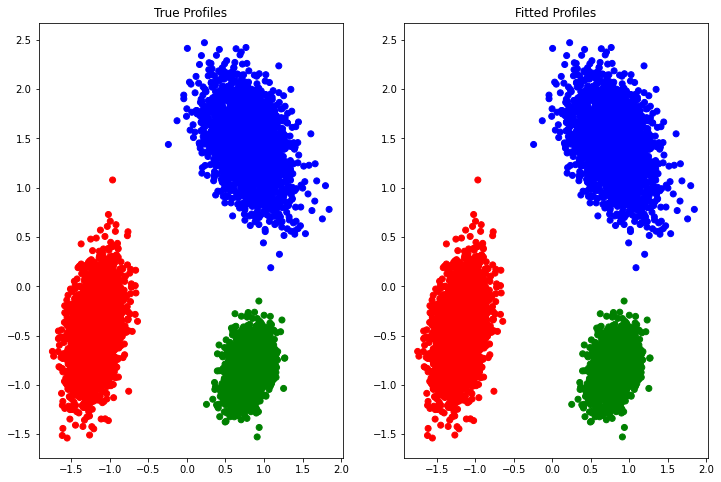

In [29]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

col_real = []
for i in range(n_obs):
  if data['cluster'][i]== 1 :
    col_real.append('r')
  elif data['cluster'][i] == 2:
    col_real.append('b')
  else :
    col_real.append('g')
ax1.scatter(data['x1'], data['x2'], color=col_real)
ax1.set_title('True Profiles')

col_fitted = []
for i in range(n_obs):
  if fitted_cluster[i]== 1 :
    col_fitted.append('g')
  elif fitted_cluster[i] == 2:
    col_fitted.append('b')
  else :
    col_fitted.append('r')
ax2.scatter(data['x1'], data['x2'], color=col_fitted)
ax2.set_title('Fitted Profiles')
plt.savefig('fitted_cluster_3_clust.png', bbox_inches='tight')

In [30]:
n = len(data['y'])
# Numero di parametri nel modello (compreso il termine costante)
k = 4 * 3

# Calcolo AIC e BIC
aic_clust3 = 2 * k - 2 * log_l[-1] 
bic_clust3 = np.log(n_obs) * k - 2 * log_l[-1]

print(f"AIC: {aic_clust3}")
print(f"BIC: {bic_clust3}")

AIC: 32283.92957969856
BIC: 32367.001479292852


In [14]:
params, log_l, z, iter = Algo_full(data = data, y = data['y'], C = 4,
                             U = data[['x1','x2']], V = data['cat_B'], num_fix = 3,
                             num_group = n_groups, alpha = 0.01, mod = 'B',
                             num_obs_groups = np.repeat(n_per_group,n_groups),
                             group_name = 'group', name_fix = ['x1','x2','cat_B'], perc_collasso=0.05, y_name='y', max_iter=15)

5.063899635375555e-35
5.063899705282478e-35
1.701049972340519e-33
1.701049983013868e-33
1.701103395035038e-33
1.7011049653733795e-33
1.7011049685154403e-33
1.9940199754871657e-33
1.994020468863447e-33
1.9941595847224113e-33
8.838338306628295e-35
8.838338511605928e-35
3.3716789535696253e-32
3.37167896678515e-32
3.3717004562083085e-32
3.371701104937086e-32
3.3717011049863355e-32
3.626764553819465e-32
3.626765074131578e-32
3.6268216345412866e-32
6.937088656775431e-35
6.937088861289945e-35
8.79128149082516e-32
8.791281511611516e-32
8.791312700126869e-32
8.791313437733145e-32
8.791313437750165e-32
9.232072453585177e-32
9.232073194730442e-32
9.232138517209574e-32
5.93354314375436e-35
5.933543345175358e-35
1.0482993780106426e-31
1.0482993802706003e-31
1.0483029925419378e-31
1.048303064902676e-31
1.048303064904511e-31
1.0966694001013824e-31
1.0966694756913367e-31
1.0966757074922886e-31
5.175400613970893e-35
5.175400809233698e-35
1.1922894745152447e-31
1.1922894768682644e-31
1.1922933925865358e

[ 0.59031 -0.29237]
D_triu
[[    nan 0.88268]
 [    nan     nan]]
I move on to the check other masses
4.2913752714189636e-35
4.291375443313933e-35
1.369780809647773e-31
1.3697808122424932e-31
1.3697851069306056e-31
1.3697851730269774e-31
1.3697851730293778e-31
1.4256351331490816e-31
1.4256352094029805e-31
1.4256405482700664e-31
[ 0.59135 -0.29129]
D_triu
[[    nan 0.88264]
 [    nan     nan]]
I move on to the check other masses
4.291891857261268e-35
4.291892028975164e-35
1.36936373197381e-31
1.369363734570669e-31
1.3693680307893153e-31
1.3693680968888426e-31
1.3693680968912419e-31
1.4252676439163387e-31
1.4252677202031178e-31
1.4252730550182053e-31
[ 0.59181 -0.29083]
D_triu
[[    nan 0.88265]
 [    nan     nan]]
I move on to the check other masses
4.291768827898847e-35
4.2917689995365794e-35
1.3693085732099488e-31
1.369308575807932e-31
1.3693128723871684e-31
1.3693129384913478e-31
1.3693129384937462e-31
1.4252313571549275e-31
1.425231433451425e-31
1.425236767087965e-31
[ 0.59204 -0.29

[2.19037 2.19033 2.19032 2.19034 0.59382]
D_triu
[[        nan 3.80482e-05 4.47539e-05 2.01892e-05 1.59655e+00]
 [        nan         nan 6.70566e-06 1.78591e-05 1.59651e+00]
 [        nan         nan         nan 2.45647e-05 1.59650e+00]
 [        nan         nan         nan         nan 1.59653e+00]
 [        nan         nan         nan         nan         nan]]
6.284415927392806e-47
6.284416511622166e-47
6.284416511622166e-47
6.284416520233447e-47
6.284417479700618e-47
6.325603617407781e-47
2.940651236818843e-46
3.0236799395394243e-46
3.0236799395396417e-46
3.0236799395396417e-46
[2.19733 2.19734 2.19736 0.60076]
D_triu
[[        nan 8.74200e-06 3.33840e-05 1.59657e+00]
 [        nan         nan 2.46420e-05 1.59658e+00]
 [        nan         nan         nan 1.59660e+00]
 [        nan         nan         nan         nan]]
6.291355656211058e-47
6.291356241842728e-47
6.291356241842728e-47
6.291356250440983e-47
6.291357214041696e-47
6.332908368245119e-47
2.934978781219659e-46
3.0175563509

[0.79656 2.13218 2.12988 2.12683 2.13573 2.11989]
D_triu
[[    nan 1.33562 1.33332 1.33028 1.33918 1.32333]
 [    nan     nan 0.0023  0.00534 0.00356 0.01228]
 [    nan     nan     nan 0.00304 0.00586 0.00999]
 [    nan     nan     nan     nan 0.0089  0.00694]
 [    nan     nan     nan     nan     nan 0.01584]
 [    nan     nan     nan     nan     nan     nan]]
1.3028820951848123e-61
1.3028820955228572e-61
3.4736414952773175e-56
7.2807143197860795e-56
3.445700091869046e-53
3.445700091869046e-53
3.445700091869046e-53
3.445700091877682e-53
3.4457000919163466e-53
3.4457000919163466e-53
[0.82729 2.16183 2.15894 2.16539 2.15389]
D_triu
[[    nan 1.33454 1.33165 1.3381  1.3266 ]
 [    nan     nan 0.00288 0.00356 0.00794]
 [    nan     nan     nan 0.00645 0.00505]
 [    nan     nan     nan     nan 0.0115 ]
 [    nan     nan     nan     nan     nan]]
1.2537417011129594e-61
1.2537417014651672e-61
3.6006374214690905e-56
7.312958484394473e-56
3.508452770120438e-53
3.508452770120438e-53
3.50845277

[1.3577  1.35773 1.35776 1.35774 1.35774 1.35776 0.29822 1.35771]
D_triu
[[        nan 2.32566e-05 5.66572e-05 3.13827e-05 3.77167e-05 5.14250e-05
  1.05949e+00 1.01089e-05]
 [        nan         nan 3.34007e-05 8.12610e-06 1.44601e-05 2.81685e-05
  1.05951e+00 1.31477e-05]
 [        nan         nan         nan 2.52746e-05 1.89405e-05 5.23222e-06
  1.05955e+00 4.65483e-05]
 [        nan         nan         nan         nan 6.33405e-06 2.00424e-05
  1.05952e+00 2.12738e-05]
 [        nan         nan         nan         nan         nan 1.37083e-05
  1.05953e+00 2.76078e-05]
 [        nan         nan         nan         nan         nan         nan
  1.05954e+00 4.13161e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 1.05950e+00]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
4.043955735304434e-34
4.043956990920975e-34
4.06526934854236e-34
5.601917931425987e-34
5.602674060524766e-34
3.6315914

1.1448951090575348e-36
1.145403244769786e-36
6.33985825082627e-35
6.339858252619118e-35
6.3398583548667e-35
6.35145630491633e-35
6.351456306020609e-35
8.040604807507142e-35
8.066518558606953e-35
8.41073241482136e-35
2.654025765018862e-36
2.654762851348363e-36
1.4124298126665084e-33
1.4124298134785205e-33
1.4124298166064468e-33
1.4132774802979946e-33
1.4132774803045808e-33
1.4783323422704519e-33
1.4820706711892484e-33
1.4973041387326949e-33
2.0751893648952604e-36
2.0761931011124434e-36
1.6501524342981835e-32
1.6501524345650006e-32
1.6501524352508847e-32
1.650398989505553e-32
1.6503989895059246e-32
1.658496844317868e-32
1.6599192621195143e-32
1.6625006817265262e-32
2.1320787074409728e-36
2.1330129308295298e-36
1.748650233195415e-32
1.7486502335168588e-32
1.748650234289387e-32
1.748900081271101e-32
1.7489000812714173e-32
1.7578412911916028e-32
1.7594574774062595e-32
1.7620922264179188e-32
2.2236893054628508e-36
2.2245541758276306e-36
1.730200802281698e-32
1.7302008026393448e-32
1.73020080

[-0.2613   0.68085]
D_triu
[[    nan 0.94215]
 [    nan     nan]]
I move on to the check other masses
2.4189905875386243e-36
2.4196764068660295e-36
1.6689811351386183e-32
1.6689811355954952e-32
1.6689811364220076e-32
1.6692251959708723e-32
1.669225195971123e-32
1.6806886654134297e-32
1.682436679845236e-32
1.68517370286064e-32
[-0.25921  0.68292]
D_triu
[[    nan 0.94213]
 [    nan     nan]]
I move on to the check other masses
2.421165648972406e-36
2.4218494760249796e-36
1.6681911447453977e-32
1.6681911452034403e-32
1.6681911460298533e-32
1.6684351167932005e-32
1.6684351167934507e-32
1.679919466155754e-32
1.6816677286586905e-32
1.6844051127013624e-32
[-0.2577   0.68445]
D_triu
[[    nan 0.94215]
 [    nan     nan]]
I move on to the check other masses
2.4228367287015388e-36
2.4235190590691667e-36
1.66736451317478e-32
1.6673645136338347e-32
1.6673645144601309e-32
1.667608428065253e-32
1.6676084280655028e-32
1.6791079755814852e-32
1.680856701165457e-32
1.6835944133135654e-32
[-0.25664  0.6

[2.18862 2.1886  2.18858 0.59239 2.1886  2.18861]
D_triu
[[        nan 2.49118e-05 3.91123e-05 1.59623e+00 1.73202e-05 1.04757e-05]
 [        nan         nan 1.42005e-05 1.59621e+00 7.59156e-06 1.44361e-05]
 [        nan         nan         nan 1.59620e+00 2.17920e-05 2.86366e-05]
 [        nan         nan         nan         nan 1.59622e+00 1.59622e+00]
 [        nan         nan         nan         nan         nan 6.84450e-06]
 [        nan         nan         nan         nan         nan         nan]]
6.493759074676711e-47
6.493759661529738e-47
6.493759661529738e-47
6.493759669945701e-47
6.493760619437557e-47
6.533848228572767e-47
2.9775329632147674e-46
3.060854236664648e-46
3.060854236664809e-46
3.060854236664809e-46
[2.19917 2.19915 2.19913 0.60289 2.19915]
D_triu
[[        nan 2.50345e-05 3.93034e-05 1.59628e+00 1.71754e-05]
 [        nan         nan 1.42689e-05 1.59626e+00 7.85912e-06]
 [        nan         nan         nan 1.59624e+00 2.21281e-05]
 [        nan         nan        

[ 2.09443e+00  2.09862e+00  2.09126e+00 -1.07851e-04  2.10223e+00
  2.08907e+00  1.12983e+00]
D_triu
[[    nan 0.00419 0.00317 2.09454 0.0078  0.00536 0.9646 ]
 [    nan     nan 0.00736 2.09873 0.00361 0.00955 0.96879]
 [    nan     nan     nan 2.09137 0.01097 0.00219 0.96143]
 [    nan     nan     nan     nan 2.10233 2.08918 1.12994]
 [    nan     nan     nan     nan     nan 0.01316 0.9724 ]
 [    nan     nan     nan     nan     nan     nan 0.95924]
 [    nan     nan     nan     nan     nan     nan     nan]]
4.5358251047622326e-55
4.535825104762246e-55
4.841461880253001e-55
1.6369466946983439e-50
1.641093833772036e-50
1.641093833772036e-50
1.641093833772036e-50
1.6410938337762645e-50
1.6410938337798942e-50
1.6410938337798942e-50
[ 2.09499e+00  2.09800e+00  2.09228e+00 -1.07851e-04  2.10064e+00
  1.12983e+00]
D_triu
[[    nan 0.00301 0.00271 2.0951  0.00565 0.96516]
 [    nan     nan 0.00573 2.09811 0.00263 0.96818]
 [    nan     nan     nan 2.09239 0.00836 0.96245]
 [    nan     nan  

[ 1.06020e+00  3.05590e-01 -9.87050e-04  1.06022e+00  1.06018e+00
 -3.87655e-02  1.06020e+00]
D_triu
[[        nan 7.54611e-01 1.06119e+00 1.45492e-05 2.23050e-05 1.09897e+00
  4.87423e-06]
 [        nan         nan 3.06577e-01 7.54625e-01 7.54588e-01 3.44356e-01
  7.54606e-01]
 [        nan         nan         nan 1.06120e+00 1.06117e+00 3.77785e-02
  1.06118e+00]
 [        nan         nan         nan         nan 3.68542e-05 1.09898e+00
  1.94235e-05]
 [        nan         nan         nan         nan         nan 1.09894e+00
  1.74308e-05]
 [        nan         nan         nan         nan         nan         nan
  1.09896e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
1.1890835967216399e-32
1.1890835967533886e-32
1.1924841095423023e-32
2.011418061504418e-32
2.797858779080592e-32
3.689776327161419e-32
3.691222620645735e-32
1.854958402873847e-27
1.8549584030412294e-27
1.8549584429417564e-27
[ 1.10336e+00  3.46208e-01 -1.03640e-03  1.10338e+

3.1693474616915746e-35
3.1693474619644633e-35
5.301072339999527e-33
5.301073235801298e-33
5.4256888209629585e-33
5.427496878863906e-33
5.427496879024282e-33
5.957416649978955e-33
5.95741666648604e-33
5.957486768992449e-33
2.507082765663498e-35
2.5070827660745216e-35
1.436280190555042e-32
1.4362803122386315e-32
1.4627018217220006e-32
1.4629660810122948e-32
1.4629660810304197e-32
1.5530330170469742e-32
1.5530330189479245e-32
1.5530385223795097e-32
1.69660230495481e-35
1.6966023054332504e-35
2.4008006669080306e-32
2.4008007951405881e-32
2.4378642668765074e-32
2.4381437425550863e-32
2.438143742581526e-32
2.539083531082917e-32
2.539083532909222e-32
2.539087363904444e-32
1.5815228310658726e-35
1.5815228315407512e-35
2.5451068253667774e-32
2.545106957550063e-32
2.583923895462796e-32
2.584200086447489e-32
2.584200086475283e-32
2.687153815555582e-32
2.6871538173792205e-32
2.6871573450029047e-32
[-4.81138e-04  2.87207e-01  2.70889e-01  2.84779e-01 -5.64480e-01
  3.28702e-01  3.28930e-01  3.28642

[ 0.41435 -0.42005]
D_triu
[[   nan 0.8344]
 [   nan    nan]]
I move on to the check other masses
1.5612821274947955e-35
1.561282127933532e-35
2.47758812998493e-32
2.477588281152424e-32
2.521894871208882e-32
2.5221606191370555e-32
2.522160619164967e-32
2.6407662418006914e-32
2.6407662436003905e-32
2.640769352249104e-32
[ 0.42161 -0.41273]
D_triu
[[    nan 0.83434]
 [    nan     nan]]
I move on to the check other masses
1.5619184109623158e-35
1.561918411398368e-35
2.4709235960994746e-32
2.4709237482698747e-32
2.515364818889186e-32
2.515629968524535e-32
2.5156299685524583e-32
2.634906941093597e-32
2.6349069428942424e-32
2.634910036632942e-32
[ 0.42675 -0.4076 ]
D_triu
[[    nan 0.83435]
 [    nan     nan]]
I move on to the check other masses
1.5624119285885032e-35
1.5624119290224335e-35
2.466408667048825e-32
2.466408819971836e-32
2.510950732403895e-32
2.511215466781997e-32
2.5112154668099193e-32
2.6309971207228644e-32
2.6309971225244536e-32
2.6310002050511175e-32
[ 0.43026 -0.40411]
D_tr

[2.17264 2.17263 0.57649 2.17261 2.17262 2.17263 2.17265]
D_triu
[[        nan 8.17728e-06 1.59615e+00 3.69819e-05 1.89275e-05 1.65317e-05
  9.89139e-06]
 [        nan         nan 1.59614e+00 2.88046e-05 1.07502e-05 8.35442e-06
  1.80687e-05]
 [        nan         nan         nan 1.59611e+00 1.59613e+00 1.59614e+00
  1.59616e+00]
 [        nan         nan         nan         nan 1.80544e-05 2.04502e-05
  4.68732e-05]
 [        nan         nan         nan         nan         nan 2.39579e-06
  2.88189e-05]
 [        nan         nan         nan         nan         nan         nan
  2.64231e-05]
 [        nan         nan         nan         nan         nan         nan
          nan]]
6.47731794962139e-47
6.477318533202083e-47
6.477318533202083e-47
6.477318541648054e-47
6.47731948183535e-47
6.516600343698272e-47
2.9901121946975084e-46
3.074487916374339e-46
3.0744879163744995e-46
3.0744879163744995e-46
[2.18883 2.18882 0.59263 2.18879 2.18881 2.18884]
D_triu
[[        nan 8.23688e-06 1.59619

[2.14846 2.15348 1.18001 0.06556 2.13913 2.14583 2.13231 2.15024]
D_triu
[[        nan 5.02873e-03 9.68447e-01 2.08289e+00 9.32531e-03 2.62734e-03
  1.61486e-02 1.78478e-03]
 [        nan         nan 9.73476e-01 2.08792e+00 1.43540e-02 7.65607e-03
  2.11773e-02 3.24395e-03]
 [        nan         nan         nan 1.11444e+00 9.59122e-01 9.65820e-01
  9.52299e-01 9.70232e-01]
 [        nan         nan         nan         nan 2.07357e+00 2.08026e+00
  2.06674e+00 2.08468e+00]
 [        nan         nan         nan         nan         nan 6.69797e-03
  6.82324e-03 1.11101e-02]
 [        nan         nan         nan         nan         nan         nan
  1.35212e-02 4.41212e-03]
 [        nan         nan         nan         nan         nan         nan
          nan 1.79333e-02]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
4.261867280428078e-55
4.261867280428093e-55
4.595199113087731e-55
1.5601299298088618e-50
1.5643067581723763e-50
1.5643

[2.3874  1.42109 0.30356]
D_triu
[[    nan 0.96631 2.08384]
 [    nan     nan 1.11754]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.08384]
 [    nan     nan 1.11754]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.08384]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
3.872496332023248e-55
3.872496332023266e-55
4.306658016581114e-55
1.4128126379154394e-50
1.417569484101266e-50
1.417569484101266e-50
1.417569484101266e-50
1.4175694841040274e-50
1.4175694841073425e-50
1.4175694841073425e-50
[2.38892 1.42262 0.30504]
D_triu
[[    nan 0.9663  2.08387]
 [    nan     nan 1.11758]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.08387]
 [    nan     nan 1.11758]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.08387]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on 

[1.45582 1.45585 1.45584 1.45585 1.45576 1.45586 0.3288 ]
D_triu
[[        nan 2.99789e-05 1.05514e-05 2.69939e-05 6.96371e-05 3.70486e-05
  1.12702e+00]
 [        nan         nan 1.94276e-05 2.98499e-06 9.96160e-05 7.06970e-06
  1.12705e+00]
 [        nan         nan         nan 1.64426e-05 8.01884e-05 2.64973e-05
  1.12703e+00]
 [        nan         nan         nan         nan 9.66310e-05 1.00547e-05
  1.12705e+00]
 [        nan         nan         nan         nan         nan 1.06686e-04
  1.12695e+00]
 [        nan         nan         nan         nan         nan         nan
  1.12706e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
1.159495615105739e-33
1.159596043309159e-33
1.1742284083313277e-33
1.19001514526912e-33
1.190015220889002e-33
1.0894896551006439e-32
1.0895000434701369e-32
5.263858481023477e-29
5.294435827584257e-29
5.303317858425371e-29
[1.51332 1.51335 1.51333 1.51332 1.51336 0.38597]
D_triu
[[        nan 2.80898e-05 1.0968

6.769617098031037e-36
6.774352583305475e-36
9.354990278563101e-33
9.354990280853495e-33
9.354990282362692e-33
9.360418411531535e-33
9.360418411861868e-33
9.920528744089092e-33
9.927608169288186e-33
9.966763216107067e-33
3.8457201717941796e-36
3.8520370678668786e-36
4.306399469563547e-32
4.3063994698747345e-32
4.306399470103737e-32
4.3074462152359006e-32
4.3074462152881515e-32
4.354367699335442e-32
4.3554941495950764e-32
4.3596303984029856e-32
3.65164243108346e-36
3.657633935337243e-36
4.584763480406088e-32
4.584763480753024e-32
4.5847634809928213e-32
4.5858172125821615e-32
4.585817212633788e-32
4.6338446991709933e-32
4.635011537226728e-32
4.6389235108644304e-32
3.7265106761367694e-36
3.73219817876249e-36
4.513392884497883e-32
4.513392884872028e-32
4.513392885116433e-32
4.514439823989494e-32
4.5144398240395163e-32
4.565279360447075e-32
4.5664563755352333e-32
4.5702832947990897e-32
[ 0.4205   0.39721 -0.4948   0.42323  0.41385  0.42135  0.42373  0.42136
  0.39719  0.42273]
D_triu
[[     

[ 0.51646 -0.39518]
D_triu
[[    nan 0.91164]
 [    nan     nan]]
I move on to the check other masses
3.892783872558132e-36
3.8977770034351124e-36
4.321856213952213e-32
4.3218562143959443e-32
4.3218562146488634e-32
4.3228797996209013e-32
4.322879799666983e-32
4.380641661639097e-32
4.381832740384603e-32
4.38544565564941e-32
[ 0.51788 -0.39379]
D_triu
[[    nan 0.91166]
 [    nan     nan]]
I move on to the check other masses
3.8940506013002866e-36
3.899036864408651e-36
4.3204795681128346e-32
4.3204795685572996e-32
4.320479568810282e-32
4.321502899586052e-32
4.3215028996320915e-32
4.379333850432309e-32
4.380525056887878e-32
4.384135660435535e-32
[ 0.51899 -0.39264]
D_triu
[[    nan 0.91163]
 [    nan     nan]]
I move on to the check other masses
3.895086881710091e-36
3.9000683651789647e-36
4.3192036613815803e-32
4.31920366182649e-32
4.3192036620795446e-32
4.320226776657143e-32
4.3202267767031645e-32
4.378112991101693e-32
4.3793040520364327e-32
4.382912805408664e-32
[ 0.5194  -0.39225]
D_t

[ 2.17925e+00  9.50805e-01 -1.46970e-03  2.17926e+00  2.17927e+00]
D_triu
[[        nan 1.22844e+00 2.18072e+00 1.18785e-05 2.31856e-05]
 [        nan         nan 9.52275e-01 1.22846e+00 1.22847e+00]
 [        nan         nan         nan 2.18073e+00 2.18074e+00]
 [        nan         nan         nan         nan 1.13071e-05]
 [        nan         nan         nan         nan         nan]]
7.806509193059407e-47
7.806509376078744e-47
7.806509376078762e-47
7.806509995153028e-47
7.806539941749298e-47
7.837225244337768e-47
3.3672041605726384e-46
3.1865501282594943e-44
3.186550128259527e-44
3.186550128259527e-44
[ 2.17925e+00  9.50805e-01 -1.46970e-03  2.17927e+00]
D_triu
[[        nan 1.22844e+00 2.18072e+00 1.64715e-05]
 [        nan         nan 9.52275e-01 1.22846e+00]
 [        nan         nan         nan 2.18073e+00]
 [        nan         nan         nan         nan]]
7.806509202667438e-47
7.806509385686774e-47
7.8065093856867925e-47
7.806510004761059e-47
7.806539951357329e-47
7.837225253

[ 1.16651e+00  2.12524e+00  2.13076e+00  2.13781e+00  6.19950e-02
 -5.39521e-04]
D_triu
[[    nan 0.95873 0.96425 0.9713  1.10452 1.16705]
 [    nan     nan 0.00552 0.01257 2.06325 2.12578]
 [    nan     nan     nan 0.00704 2.06877 2.1313 ]
 [    nan     nan     nan     nan 2.07581 2.13835]
 [    nan     nan     nan     nan     nan 0.06253]
 [    nan     nan     nan     nan     nan     nan]]
4.406376225127946e-55
4.40637622512796e-55
4.72698471476916e-55
1.5843616453233997e-50
1.588584180744071e-50
1.588584180744071e-50
1.588584180744071e-50
1.5885841807481546e-50
1.588584180751754e-50
1.588584180751754e-50
[ 1.17790e+00  2.14221e+00  2.14780e+00  7.90054e-02 -5.39521e-04]
D_triu
[[    nan 0.96431 0.9699  1.09889 1.17844]
 [    nan     nan 0.00559 2.06321 2.14275]
 [    nan     nan     nan 2.06879 2.14834]
 [    nan     nan     nan     nan 0.07954]
 [    nan     nan     nan     nan     nan]]
4.3604281960285626e-55
4.360428196028577e-55
4.685606959521998e-55
1.5625325272395441e-50
1.566

[1.41918 2.38541 0.30159]
D_triu
[[    nan 0.96622 1.11759]
 [    nan     nan 2.08381]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.11759]
 [    nan     nan 2.08381]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.08381]
 [    nan     nan     nan]]
I move on to the check other masses
3.8773049347531046e-55
3.877304934753123e-55
4.310628154322161e-55
1.41412941768967e-50
1.4188806912875378e-50
1.4188806912875378e-50
1.4188806912875378e-50
1.4188806912903088e-50
1.4188806912936263e-50
1.4188806912936263e-50
[1.42126 2.3875  0.30366]
D_triu
[[    nan 0.96624 1.1176 ]
 [    nan     nan 2.08384]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.1176 ]
 [    nan     nan 2.08384]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.08384]
 [    nan     nan     nan]]
I move o

[ 1.03789e+00  1.03792e+00  1.03788e+00  1.03790e+00  1.03791e+00
  1.03792e+00 -3.00871e-04]
D_triu
[[        nan 3.43007e-05 8.56686e-06 6.02572e-06 1.80486e-05 2.72203e-05
  1.03819e+00]
 [        nan         nan 4.28675e-05 2.82749e-05 1.62521e-05 7.08033e-06
  1.03823e+00]
 [        nan         nan         nan 1.45926e-05 2.66154e-05 3.57872e-05
  1.03818e+00]
 [        nan         nan         nan         nan 1.20228e-05 2.11946e-05
  1.03820e+00]
 [        nan         nan         nan         nan         nan 9.17177e-06
  1.03821e+00]
 [        nan         nan         nan         nan         nan         nan
  1.03822e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
8.534737440312338e-33
8.534737440376159e-33
8.547868617887117e-33
1.496124258061191e-32
3.6324116752238796e-32
3.852854758470114e-32
3.852861895196527e-32
3.914237389679251e-28
3.9142373919638627e-28
3.9142375465300007e-28
[ 1.03790e+00  1.03792e+00  1.03788e+00  1.03791e+00

/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2168: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


2.3328757434575387e-36
2.3328757750798833e-36
3.7596318187000843e-32
3.7596318287601166e-32
4.7661950858693084e-32
4.766263591287018e-32
4.766263591293856e-32
4.915579023984199e-32
4.915579042402545e-32
4.9155793068752924e-32
1.8690659460124127e-36
1.8690659745770798e-36
1.4217572622803332e-31
1.4217572648703569e-31
1.521983932846071e-31
1.5219946991551765e-31
1.5219946991554535e-31
1.5471452590986814e-31
1.5471452638142176e-31
1.547145297912267e-31
1.6050324908342623e-36
1.6050325208505442e-36
1.6683504698722257e-31
1.6683504727762519e-31
1.782598485697103e-31
1.7826092134230751e-31
1.7826092134233169e-31
1.8087657790545775e-31
1.8087657842507575e-31
1.8087658161028799e-31
1.5514691527161584e-36
1.5514691838645146e-36
1.6914403698787905e-31
1.691440372802956e-31
1.8121569075130373e-31
1.8121676676590475e-31
1.8121676676592826e-31
1.8387055182573052e-31
1.8387055234606296e-31
1.8387055549365018e-31
1.532220883920774e-36
1.5322209155834903e-36
1.6910131361399817e-31
1.6910131390764937e-

[ 0.17184 -0.59608]
D_triu
[[    nan 0.76792]
 [    nan     nan]]
I move on to the check other masses
1.4758864317686667e-36
1.4758864656333888e-36
1.5203738315149588e-31
1.5203738348483336e-31
1.6827693059421255e-31
1.6827801325734164e-31
1.6827801325735937e-31
1.7140895543700492e-31
1.7140895597924415e-31
1.7140895874795437e-31
[ 0.1857  -0.58221]
D_triu
[[    nan 0.76791]
 [    nan     nan]]
I move on to the check other masses
1.4750525521438154e-36
1.475052585719972e-36
1.5057591914707496e-31
1.5057591948479963e-31
1.6695265458813289e-31
1.6695373419062014e-31
1.669537341906379e-31
1.7010928329313957e-31
1.7010928383831876e-31
1.7010928657640563e-31
[ 0.19551 -0.57239]
D_triu
[[    nan 0.76791]
 [    nan     nan]]
I move on to the check other masses
1.4744899224884045e-36
1.474489955845385e-36
1.495488040694505e-31
1.495488044103067e-31
1.6602731584256645e-31
1.6602839319153245e-31
1.660283931915502e-31
1.6920214970025124e-31
1.6920215024753952e-31
1.692021529634713e-31
[ 0.20243 -

[0.5924  2.18857 2.18856 2.18853 2.18858 2.18855]
D_triu
[[        nan 1.59617e+00 1.59616e+00 1.59614e+00 1.59618e+00 1.59615e+00]
 [        nan         nan 8.75955e-06 3.50636e-05 7.33038e-06 1.64123e-05]
 [        nan         nan         nan 2.63040e-05 1.60899e-05 7.65279e-06]
 [        nan         nan         nan         nan 4.23939e-05 1.86512e-05]
 [        nan         nan         nan         nan         nan 2.37427e-05]
 [        nan         nan         nan         nan         nan         nan]]
6.492656315614095e-47
6.492656902564342e-47
6.492656902564342e-47
6.49265691097615e-47
6.492657859967731e-47
6.532749013468185e-47
2.977412182846976e-46
3.060668544652428e-46
3.060668544652589e-46
3.060668544652589e-46
[0.60272 2.19896 2.19895 2.19892 2.19894]
D_triu
[[        nan 1.59624e+00 1.59623e+00 1.59620e+00 1.59622e+00]
 [        nan         nan 1.22520e-05 3.86848e-05 1.99438e-05]
 [        nan         nan         nan 2.64328e-05 7.69174e-06]
 [        nan         nan         n

[ 1.12910e+00  2.08406e+00 -8.17758e-04  2.09051e+00  2.10292e+00
  2.09122e+00  2.09169e+00]
D_triu
[[        nan 9.54955e-01 1.12992e+00 9.61413e-01 9.73815e-01 9.62118e-01
  9.62584e-01]
 [        nan         nan 2.08487e+00 6.45864e-03 1.88608e-02 7.16371e-03
  7.62943e-03]
 [        nan         nan         nan 2.09133e+00 2.10373e+00 2.09204e+00
  2.09250e+00]
 [        nan         nan         nan         nan 1.24022e-02 7.05076e-04
  1.17079e-03]
 [        nan         nan         nan         nan         nan 1.16971e-02
  1.12314e-02]
 [        nan         nan         nan         nan         nan         nan
  4.65717e-04]
 [        nan         nan         nan         nan         nan         nan
          nan]]
4.5358926090239745e-55
4.535892609023988e-55
4.841231977981521e-55
1.6374173553078226e-50
1.6415626998843664e-50
1.6415626998843664e-50
1.6415626998843664e-50
1.6415626998885998e-50
1.6415626998922301e-50
1.6415626998922301e-50
[ 1.12910e+00  2.08726e+00 -8.17758e-04  2.0919

[1.65451 0.45415 1.65452 1.65448 1.65453 1.65454 1.65455]
D_triu
[[        nan 1.20036e+00 6.60145e-06 3.10320e-05 1.56481e-05 2.71898e-05
  3.96925e-05]
 [        nan         nan 1.20037e+00 1.20033e+00 1.20038e+00 1.20039e+00
  1.20040e+00]
 [        nan         nan         nan 3.76334e-05 9.04665e-06 2.05883e-05
  3.30910e-05]
 [        nan         nan         nan         nan 4.66801e-05 5.82218e-05
  7.07245e-05]
 [        nan         nan         nan         nan         nan 1.15417e-05
  2.40444e-05]
 [        nan         nan         nan         nan         nan         nan
  1.25027e-05]
 [        nan         nan         nan         nan         nan         nan
          nan]]
4.2913493045206194e-32
4.2913506855189557e-32
4.2915863633823386e-32
4.3011088840421524e-32
4.3011088841852365e-32
1.0197367929221594e-31
1.019789068984453e-31
3.490297000812645e-29
3.490739110624063e-29
3.569906158366594e-29
[1.73214 0.53131 1.7321  1.73215 1.73216 1.73218]
D_triu
[[        nan 1.20083e+00 3.

FINE ITERAZIONE 4
ALGORITMO ARRIVATO A CONVERGENZA


In [15]:
fitted_cluster = np.zeros(n_obs)
for i in range(n_obs):
  fitted_cluster[i] = np.argmax(params['z'][i]) + 1

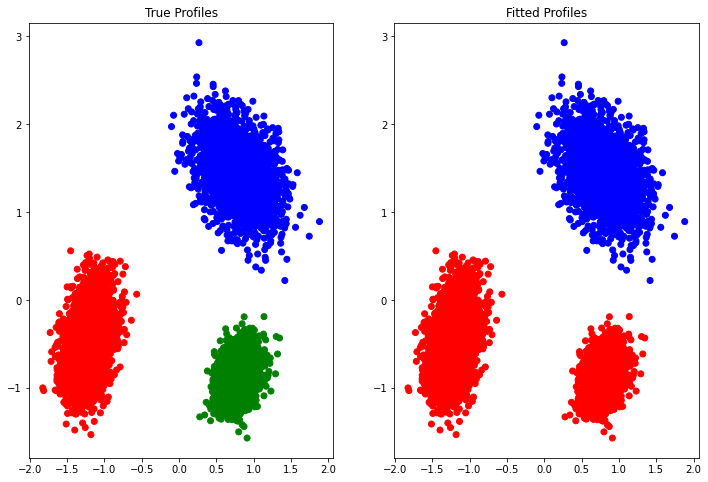

In [20]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

col_real = []
for i in range(n_obs):
  if data['cluster'][i]== 1 :
    col_real.append('r')
  elif data['cluster'][i] == 2:
    col_real.append('b')
  else :
    col_real.append('g')
ax1.scatter(data['x1'], data['x2'], color=col_real)
ax1.set_title('True Profiles')

col_fitted = []
for i in range(n_obs):
  if fitted_cluster[i]== 1 :
    col_fitted.append('r')
  elif fitted_cluster[i]==2 :
    col_fitted.append('b')
  elif fitted_cluster[i]==3 :
    col_fitted.append('g')
  else :
    col_fitted.append('y')
ax2.scatter(data['x1'], data['x2'], color=col_fitted)
ax2.set_title('Fitted Profiles')
plt.savefig('Fitted cluster 4.png')


In [37]:
n = len(data['y'])
# Numero di parametri nel modello (compreso il termine costante)
k = 4 * 4

# Calcolo AIC e BIC
aic_clust4 = 2 * k - 2 * log_l[-1] 
bic_clust4 = np.log(n) * k - 2 * log_l[-1]

print(f"AIC: {aic_clust4}")
print(f"BIC: {bic_clust4}")

AIC: 34286.33295889396
BIC: 34397.09549168635


In [38]:
indici_AIC = pd.DataFrame({'AIC - 2 clust' : [aic_clust2],
                    'AIC - 3 clust' : [aic_clust3],
                    'AIC - 4 clust' : aic_clust4})
indici_AIC

,AIC - 2 clust,AIC - 3 clust,AIC - 4 clust
0,46910.577188,32283.92958,34286.332959


In [56]:
indici_BIC = pd.DataFrame({'BIC - 2 clust' : [bic_clust2],
                    'BIC - 3 clust' : [bic_clust3],
                    'BIC - 4 clust' : bic_clust4})
indici_BIC

,BIC - 2 clust,BIC - 3 clust,BIC - 4 clust
0,31017.413272,21365.808938,22457.310086


In [ ]:
import pickle
import os

# I tuoi parametri
parametri = {
    'parameters': params,
    'loglikelihood': log_l,
    'z': z,
    # Aggiungi altri parametri se necessario
}

# Imposta il percorso del file
file_path = '/content/parametri_simulazione_1_2_loglSPGLMM.pkl'

# Salvare i parametri in un file con pickle
with open(file_path, 'wb') as file:
    pickle.dump(parametri, file)

In [ ]:
# per leggere i parametri

import pickle

# Imposta il percorso del file
file_path = '/content/parametri_simulazione_1_1_loglSPGLMM.pkl'

# Caricare i parametri da un file con pickle
with open(file_path, 'rb') as file:
    parametri_caricati = pickle.load(file)


In [ ]:
log_l = parametri_caricati['loglikelihood']

In [ ]:
params = parametri_caricati['parameters']

In [ ]:
z = parametri_caricati['z']